#Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Muhammad Arsyad Ramadhan
- Email: arsyad351@gmail.com
- Id Dicoding: arsyad351

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1. Bagaimana pendapatan perusahaan dalam setahun terakhir?
- Pertanyaan 2: Bagaimana order status dari kategori produk?
- Pertanyaan 3: Apa saja dan berapa banyak customer melakukan pembayaran berdasarkan tipe pembayaran?
- Pertanyaan 4: Berapa banyak angsuran dengan pembayaran menggunakan credit card?
- Pertanyaan 5: Kategori produk apa yang memiliki penjualan terbanyak?
- Pertanyaan 6: Barang apa yang memiliki biaya pengankutan yang mahal?
- Pertanyaan 7: Barang apa saja yang termahal dalam produk?
- Pertanyaan 8: Bagaimana persentase review score dari masing-masing produk?
- Pertanyaan 9: Bagaimana pengeluaran customer yang melakukan pembayaran dari masing-masing tipe pembayaran?
- Pertanyaan 10: Bagaimana pengeluaran rata-rata customer berdasarkan kota customer?
- Pertanyaan 11: Dari kota dan negara mana customer dengan pembelian terbanyak?
- Pertanyaan 12: Dari kota dan negara mana seller melakukan penjualan terbanyak?

## Menyaipkan semua library yang dibuthkan

In [9]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import datetime
from datetime import datetime

from os import path
import os

##Data Wrangling

###Gathering Data

In [10]:
os.listdir('Data/')

['customers_dataset.csv',
 'geolocation_dataset.csv',
 'New Text Document.txt',
 'orders_dataset.csv',
 'order_items_dataset.csv',
 'order_payments_dataset.csv',
 'order_reviews_dataset.csv',
 'products_dataset.csv',
 'product_category_name_translation.csv',
 'sellers_dataset.csv']

In [11]:
orders_df = pd.read_csv('Data/orders_dataset.csv')
order_items_df = pd.read_csv('Data/order_items_dataset.csv')
order_reviews_df = pd.read_csv('Data/order_reviews_dataset.csv')
products_df = pd.read_csv('Data/products_dataset.csv')
order_payments_df = pd.read_csv('Data/order_payments_dataset.csv')
geolocations_df = pd.read_csv('Data/geolocation_dataset.csv')
sellers_df = pd.read_csv('Data/sellers_dataset.csv')
customers_df = pd.read_csv('Data/customers_dataset.csv')
products_category_df = pd.read_csv('Data/product_category_name_translation.csv')

###Assesing Data

####Melihat Missing Value

In [12]:
data = [orders_df, order_items_df, order_reviews_df, products_df,
        order_payments_df, geolocations_df, sellers_df, customers_df, products_category_df]

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

for i in data:
  print('\nDataframe: {}'.format(get_df_name(i)))
  print(i.isnull().sum())


Dataframe: orders_df
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Dataframe: order_items_df
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Dataframe: order_reviews_df
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Dataframe: products_df
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photo

Terdapat 3 dataframe mempunyai missing value
1. orders_df
2. order_reviews_df
3. products_df

In [13]:
print(orders_df.isnull().sum(),'\n')
print(order_reviews_df.isnull().sum(),'\n')
print(products_df.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64 

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


####Melihat Tipe Data Kolom

In [14]:
data = [orders_df, order_items_df, order_reviews_df, products_df,
        order_payments_df, geolocations_df, sellers_df, customers_df, products_category_df]

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

for i in data:
  print('\nDataframe: {}'.format(get_df_name(i)))
  print(i.info())


Dataframe: orders_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Dataframe: order_items_df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   ----

####Melihat Data Duplikat

In [15]:
data = [orders_df, order_items_df, order_reviews_df, products_df,
        order_payments_df, geolocations_df, sellers_df, customers_df, products_category_df]

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

for i in data:
  print('\nDataframe: {}'.format(get_df_name(i)))
  print(i.duplicated().sum())


Dataframe: orders_df
0

Dataframe: order_items_df
0

Dataframe: order_reviews_df
0

Dataframe: products_df
0

Dataframe: order_payments_df
0

Dataframe: geolocations_df
261831

Dataframe: sellers_df
0

Dataframe: customers_df
0

Dataframe: products_category_df
0


### Cleaning Data

####HANDLING MISSING VALUE

####Handling missing value pada orders_df dataframe

In [16]:
orders_df[orders_df['order_approved_at'].isnull() == True].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00


Menghilangkan missing value dengan melakukan drop

In [17]:
orders_df.dropna(inplace=True)
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

####Handling missing value pada order_reviews_df dataframe

#####Missing value berada pada kolom 'review_comment_title' dan 'review_comment_message'

#####Mengisi missing value dengan menggunakan kata kata yang paling sering keluar/modus pada kolom review_score. Akan menyesuaikan jika review_comment_title mempunyai missing value dengan review_score = 5 maka akan di isi menggunakan nilai modus review_comment_title pada review_score = 5 juga. Begitu pula dengan review_score yang lainnya

In [18]:
# ORDER_REVIEWS_DF Dataframe
# Make all value in review comment title column is capitalize
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].str.lower()
order_reviews_df['review_comment_title'] = order_reviews_df['review_comment_title'].str.title()

order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.lower()
order_reviews_df['review_comment_message'] = order_reviews_df['review_comment_message'].str.title()
order_reviews_df.head()

rating1 = order_reviews_df[order_reviews_df['review_score']==1]
rating2 = order_reviews_df[order_reviews_df['review_score']==2]
rating3 = order_reviews_df[order_reviews_df['review_score']==3]
rating4 = order_reviews_df[order_reviews_df['review_score']==4]
rating5 = order_reviews_df[order_reviews_df['review_score']==5]

print('Nilai modus pada masing-masing kolom review_comment_title sesuai dengan review_score:\n')
print('rating 5: ', rating5['review_comment_title'].mode()[0])
print('rating 4: ', rating4['review_comment_title'].mode()[0])
print('rating 3: ', rating3['review_comment_title'].mode()[0])
print('rating 2: ', rating2['review_comment_title'].mode()[0])
print('rating 1: ', rating1['review_comment_title'].mode()[0])

print('\nNilai modus pada masing-masing kolom review_comment_message sesuai dengan review_score:\n')
print('rating 5: ', rating5['review_comment_message'].mode()[0])
print('rating 4: ', rating4['review_comment_message'].mode()[0])
print('rating 3: ', rating3['review_comment_message'].mode()[0])
print('rating 2: ', rating2['review_comment_message'].mode()[0])
print('rating 1: ', rating1['review_comment_message'].mode()[0])

Nilai modus pada masing-masing kolom review_comment_title sesuai dengan review_score:

rating 5:  Super Recomendo
rating 4:  Recomendo
rating 3:  Bom
rating 2:  Não Recomendo
rating 1:  Não Recomendo

Nilai modus pada masing-masing kolom review_comment_message sesuai dengan review_score:

rating 5:  Muito Bom
rating 4:  Bom
rating 3:  Bom
rating 2:  Bom
rating 1:  Não Recebi O Produto


In [19]:
# mengecek apakah data yang dimasukkan sudah benar atau belum
order_reviews_df['review_comment_title'].isnull().sum() - order_reviews_df.loc[order_reviews_df['review_score']==5]['review_comment_title'].isnull().sum()
# dengan melihat hasilnya (banyak missing value pada kolom review_comment_title di kurang banyak missing value pada review_score = 5 pada kolom review_comment_title)
# maka hasilnya 36986 sesuai dengan angka setelah dilakukan fillna pada kolom tersebut, dikarenakan kita ingin memberikan review sesuai pada penempatan review_score

36986

In [20]:
order_reviews_df.loc[(order_reviews_df['review_score']==1) & (order_reviews_df['review_comment_title'].isnull()==True), 'review_comment_title'] = rating1['review_comment_title'].mode()[0]
order_reviews_df.loc[(order_reviews_df['review_score']==2) & (order_reviews_df['review_comment_title'].isnull()==True), 'review_comment_title'] = rating2['review_comment_title'].mode()[0]
order_reviews_df.loc[(order_reviews_df['review_score']==3) & (order_reviews_df['review_comment_title'].isnull()==True), 'review_comment_title'] = rating3['review_comment_title'].mode()[0]
order_reviews_df.loc[(order_reviews_df['review_score']==4) & (order_reviews_df['review_comment_title'].isnull()==True), 'review_comment_title'] = rating4['review_comment_title'].mode()[0]
order_reviews_df.loc[(order_reviews_df['review_score']==5) & (order_reviews_df['review_comment_title'].isnull()==True), 'review_comment_title'] = rating5['review_comment_title'].mode()[0]

order_reviews_df.loc[(order_reviews_df['review_score']==1) & (order_reviews_df['review_comment_message'].isnull()==True), 'review_comment_message'] = rating1['review_comment_message'].mode()[0]
order_reviews_df.loc[(order_reviews_df['review_score']==2) & (order_reviews_df['review_comment_message'].isnull()==True), 'review_comment_message'] = rating2['review_comment_message'].mode()[0]
order_reviews_df.loc[(order_reviews_df['review_score']==3) & (order_reviews_df['review_comment_message'].isnull()==True), 'review_comment_message'] = rating3['review_comment_message'].mode()[0]
order_reviews_df.loc[(order_reviews_df['review_score']==4) & (order_reviews_df['review_comment_message'].isnull()==True), 'review_comment_message'] = rating4['review_comment_message'].mode()[0]
order_reviews_df.loc[(order_reviews_df['review_score']==5) & (order_reviews_df['review_comment_message'].isnull()==True), 'review_comment_message'] = rating5['review_comment_message'].mode()[0]

order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

####Handling missing value pada products_df dataframe

#####Dapat dilihat pada kolom "product_name_lenght" dan "product_escription_lenght" terdapat kesalahan penulisan, maka dari itu dilakukan pengubahan nama kolom

In [21]:
products_df.rename(columns={'product_name_lenght': 'product_name_length',
                    'product_description_lenght': 'product_description_length'}, inplace=True)
products_df.head()

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#####Pada dataframe producst_df Kolom yang terdapat missing value memiliki index yang sama dengan yang terdapat missing value, maka dari itu langkah yang paling tepat kita lakukan ialah melakukan dropping pada missing value tersebut

In [22]:
products_df.dropna(inplace=True)
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

####HANDLING UNACCURATE TYPE DATA

####Handling order_reviews_df dataframe
#####order_reviews_df pada kolom "review_creation_date" dan "review_answer_timestamp" tipe data tersebut masih object, maka dari itu kita harus melakukan konversi ke dalam tipe data datetime dikarenakan nilai dari dalam kolom tersebut merupakan datetime

In [23]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


####Handling orders_df dataframe
#####orders_df merupakan kolom date time tetapi masih terbaca sebagai tipe data objek, maka dari itu kita akan ubah juga menjadi tipe data datetime

In [24]:
orders_df['order_estimated_delivery_date'].astype(str).str[10:].value_counts()
# as we can see order_estimated_delivery_date is don't have unique value on hours, minutes and second. Because all the value is 00:00:00

 00:00:00    96461
Name: order_estimated_delivery_date, dtype: int64

In [25]:
# Convert type data object into date time
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#####Kolom products_df terbaca sebagai float, dikarenakan tipe data float kurang tepat untuk kolom tersebut, maka kita ubah menjadi tipe data integer

In [26]:
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype(int)

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
data = [orders_df, order_items_df, order_reviews_df, products_df,
        order_payments_df, geolocations_df, sellers_df, customers_df, products_category_df]

for i in data:
  print('======================================')
  print('\nDataframe: {}'.format(get_df_name(i)))
  print(i.describe().T)


Dataframe: orders_df
                               count unique                               top  \
order_id                       96461  96461  e481f51cbdc54678b7cc49136f2d6af7   
customer_id                    96461  96461  9ef432eb6251297304e76186b10a928d   
order_status                   96461      2                         delivered   
order_purchase_timestamp       96461  95939               2018-08-02 12:05:26   
order_approved_at              96461  88272               2018-02-27 04:31:10   
order_delivered_carrier_date   96461  80100               2018-05-09 15:48:00   
order_delivered_customer_date  96461  95649               2018-05-14 20:02:44   
order_estimated_delivery_date  96461    445               2017-12-20 00:00:00   

                                freq               first                last  
order_id                           1                 NaT                 NaT  
customer_id                        1                 NaT                 NaT  
order_statu

####products_df dataframe pada kolom product_weight_g terdapat nilai 0 gram yang berarti nilai tersebut tidak akurat terhadap berat produk tersebut
#####Maka saya akan melihat kesamaan dari masing-masing kolom dengan yang berhubungan nilai 0 gram dan yang tidak 0 gram

In [28]:
products_df.loc[(products_df['product_category_name'] == 'cama_mesa_banho') &
                (products_df['product_length_cm'] == 30.0) &
                (products_df['product_height_cm'] == 25.0) &
                (products_df['product_width_cm'] == 30.0)
                ]
# as we can see the result is have 3100 gram in the other product with the same name, length, height, and width,
# then i will fill the 0 gram into 3100 gram in "product_weight_g" columns

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1731,500909059ad72b36b2554150cc327edb,cama_mesa_banho,39.0,1140.0,1,3100.0,30.0,25.0,30.0
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1,0.0,30.0,25.0,30.0


#####Terdapat 3100 gram pada berat product dengan panjang berat dan lebar barang yang sama dalam satuan cm. Maka dari itu kita akan mengisi 0 gram tersebut dengan 3100 gram

In [29]:
products_df.loc[products_df['product_weight_g'] == 0.0, 'product_weight_g'] = 3100.0
products_df[products_df['product_weight_g']== 0.0]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


#####Pada order_reviews_df dataframe kita bisa melakukan feature engineering dengan menambahkan 1 kolom seperti pada code dibawah ini. Dengan tujuan untuk mengetahui butuh berapa hari review barang dijawab

In [30]:
# ORDER_REVIEWS_DF Dataframe
# Make a column review_time
review_time = order_reviews_df["review_answer_timestamp"] - order_reviews_df["review_creation_date"]
review_time = review_time.apply(lambda x: x.total_seconds())
order_reviews_df["review_time"] = round(review_time/86400)
order_reviews_df["review_time"] = order_reviews_df["review_time"].astype(int)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_time
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,Bom,2018-01-18,2018-01-18 21:46:59,1
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Super Recomendo,Muito Bom,2018-03-10,2018-03-11 03:05:13,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Super Recomendo,Muito Bom,2018-02-17,2018-02-18 14:36:24,2
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Super Recomendo,Recebi Bem Antes Do Prazo Estipulado.,2017-04-21,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Super Recomendo,Parabéns Lojas Lannister Adorei Comprar Pela I...,2018-03-01,2018-03-02 10:26:53,1


## Visualization & Explanatory Analysis

In [31]:
# Merge dataframe
tmp_merge_products_df = pd.merge(order_items_df, products_df[['product_id', 'product_category_name']], how='inner', on='product_id')
tmp_merge_products_df = tmp_merge_products_df.merge(orders_df, how='inner', on='order_id')
tmp_merge_products_df = tmp_merge_products_df.merge(products_category_df, how='inner', on='product_category_name')
tmp_merge_products_df = tmp_merge_products_df.merge(order_reviews_df[['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message']], how='inner', on='order_id')
tmp_merge_products_df = tmp_merge_products_df.merge(order_payments_df, how='inner', on='order_id')

# order_items_ df = seller_id
# orders_df = customer_id
tmp_customer_locations_df = pd.merge(tmp_merge_products_df, customers_df, how='inner', on='customer_id')
tmp_seller_locations_df = pd.merge(tmp_merge_products_df, sellers_df, how='inner', on='seller_id')
tmp_merge_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id,order_status,...,order_estimated_delivery_date,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-29,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,Super Recomendo,"Perfeito, Produto Entregue Antes Do Combinado.",1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,delivered,...,2017-07-26,cool_stuff,b11cba360bbe71410c291b764753d37f,5,Super Recomendo,"Lannister Como Sempre, Entregou Certinho E Den...",1,boleto,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,4ef55bf80f711b372afebcb7c715344a,delivered,...,2018-06-07,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4,Super Recomendo,Carrinho Muito Bonito,1,credit_card,2,83.23
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,delivered,...,2017-08-25,cool_stuff,8304ff37d8b16b57086fa283fe0c44f8,5,Super Recomendo,Muito Bom,1,credit_card,3,75.07
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,delivered,...,2017-09-01,cool_stuff,426f43a82185969503fb3c86241a9535,5,Super Recomendo,Muito Bom,1,credit_card,4,72.19


In [32]:
# Export to csv
# tmp_merge_products_df.to_csv('main_df.csv')
# tmp_customer_locations_df.to_csv('customer.csv')
# tmp_seller_locations_df.to_csv('seller.csv')

array([[<Axes: title={'center': 'order_item_id'}>,
        <Axes: title={'center': 'shipping_limit_date'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>],
       [<Axes: title={'center': 'order_purchase_timestamp'}>,
        <Axes: title={'center': 'order_approved_at'}>,
        <Axes: title={'center': 'order_delivered_carrier_date'}>,
        <Axes: title={'center': 'order_delivered_customer_date'}>],
       [<Axes: title={'center': 'order_estimated_delivery_date'}>,
        <Axes: title={'center': 'review_score'}>,
        <Axes: title={'center': 'payment_sequential'}>,
        <Axes: title={'center': 'payment_installments'}>],
       [<Axes: title={'center': 'payment_value'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

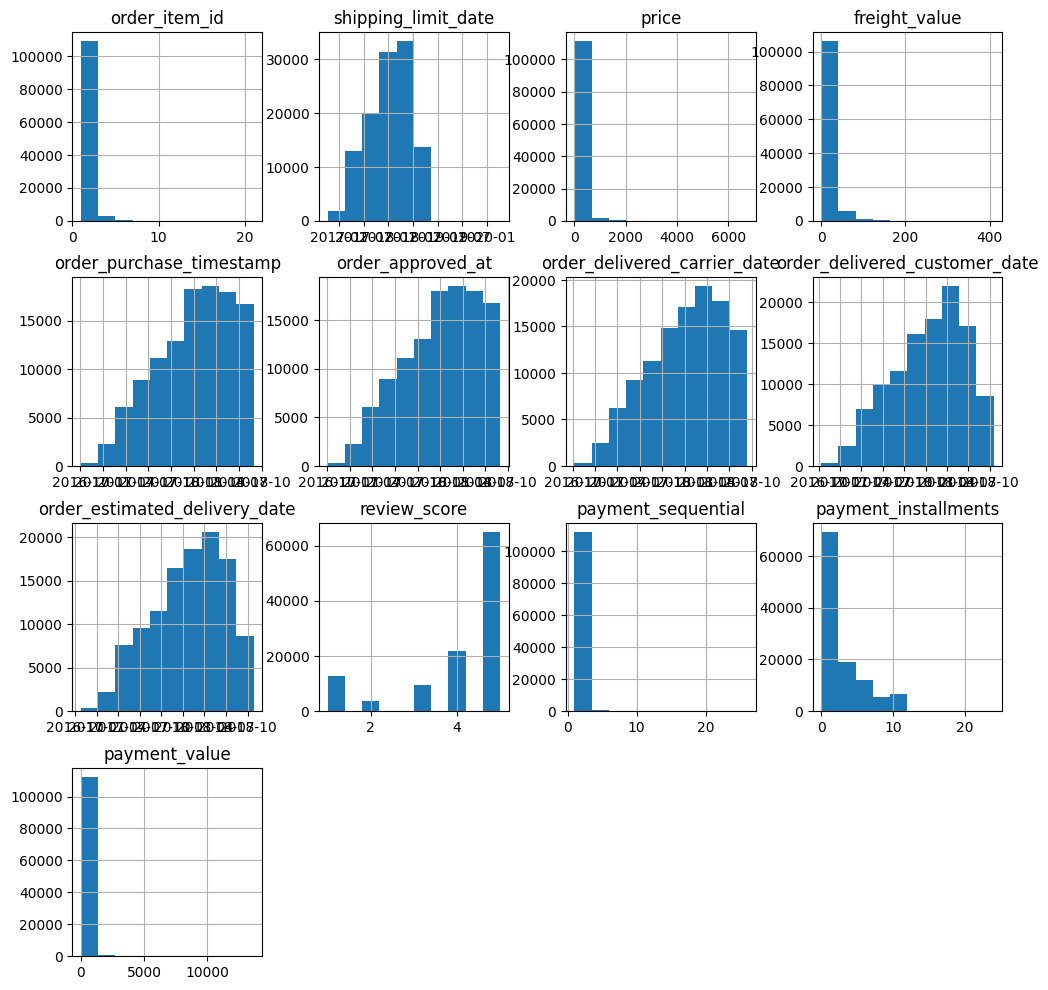

In [33]:
tmp_merge_products_df.hist(figsize=(12,12))

### Pertanyaan 1: Bagaimana revenue perusahaan dalam setahun terakhir?

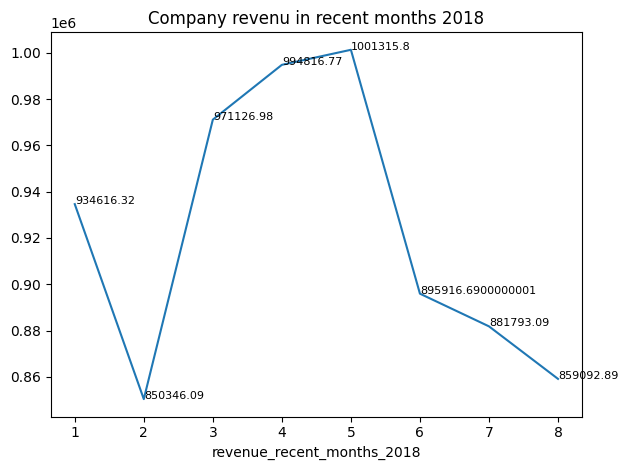

In [34]:
# bagaimana revenue setahun terakhir?
# company revenue in recent months?

tmp_merge_products_2018_df = tmp_merge_products_df[tmp_merge_products_df['order_purchase_timestamp'].dt.year == 2018]
tmp_merge_products_2018_df['revenue_recent_months_2018'] = tmp_merge_products_2018_df['order_purchase_timestamp'].dt.month
tmp_company_revenue_2018 = tmp_merge_products_2018_df.groupby(['revenue_recent_months_2018']).agg({'product_id': 'count', 'price': 'sum'})

fig,ax = plt.subplots()
tmp_company_revenue_2018['price'].plot.line(ax=ax)

# annotate points in axis
for idx, row in tmp_company_revenue_2018.iterrows():
    ax.annotate(row['price'], (idx, row['price']), fontsize=8)
# force matplotlib to draw the graph

plt.title('Company revenu in recent months 2018')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana order status dari kategori produk?

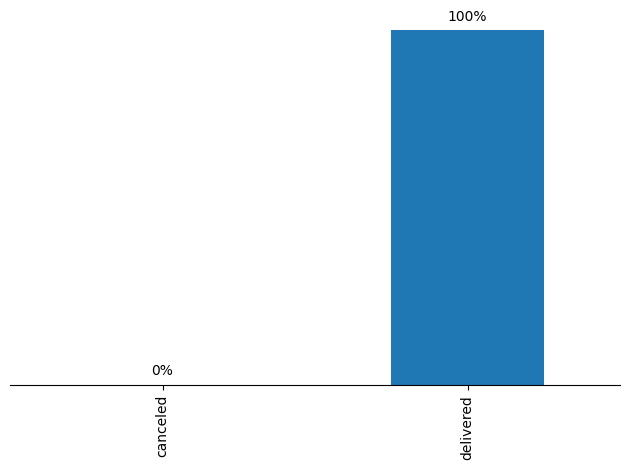

In [35]:
# Order status terbanyak
splot = tmp_merge_products_df['order_status'].value_counts(ascending=True).plot.bar()
for p in splot.patches:
    splot.annotate(format(p.get_height()/tmp_merge_products_df.shape[0], '.0%'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points')

# Setting Plot
sns.despine(right=True,top = True, left = True)
splot.axes.yaxis.set_visible(False)
plt.tight_layout()
plt.show()

### Pertanyaan 3: Apa saja dan berapa banyak customer melakukan pembayaran berdasarkan tipe pembayaran?
###Pertanyaan 4: Berapa banyak angsuran dengan pembayaran menggunakan credit card?

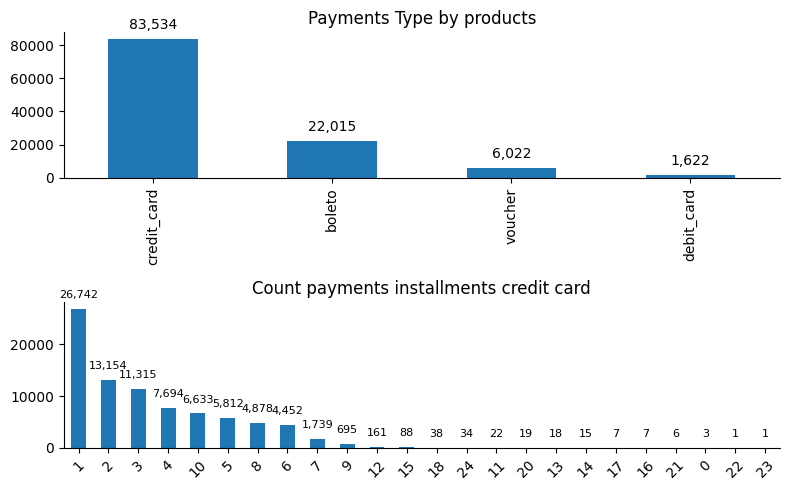

In [36]:
fig,ax = plt.subplots(2,1)

# Apa saja yang digunakan untuk melakukan pembayaran produk
splot = tmp_merge_products_df['payment_type'].value_counts().plot.bar(ax=ax[0], figsize=(8, 5))
for k in splot.patches:
  splot.annotate(format(k.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                  (k.get_x() + k.get_width() / 2., k.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')
ax[0].set_title('Payments Type by products')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.tight_layout()

# Berapa banyak angsuran dilakukan dengan pembayaran menggunakan credit card? (angsurang terbanyak)
tmp_count_payment_installment_cc_df = tmp_merge_products_df[tmp_merge_products_df['payment_type'] == 'credit_card']
splot = tmp_count_payment_installment_cc_df['payment_installments'].value_counts().plot.bar(ax=ax[1], figsize=(8, 5))
for k in splot.patches:
  splot.annotate(format(k.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                  (k.get_x() + k.get_width() / 2., k.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points',
                 fontsize=8)

ax[1].set_title('Count payments installments credit card')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Pertanyaan 5: Kategori produk apa yang memiliki penjualan terbanyak?

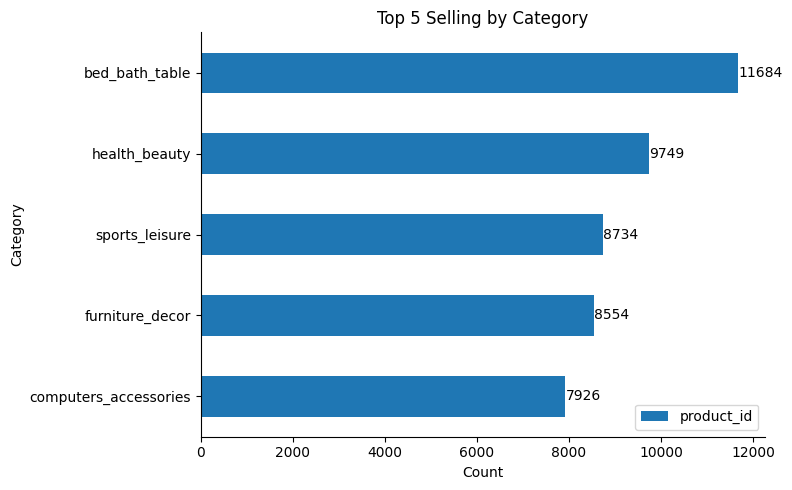

In [37]:
# Barang mana yang memiliki penjualan terbanyak?
# Mencari top 5 kategory products
# find top 5 category products
tmp_top5_category_merge_products_df = tmp_merge_products_df.groupby(['product_category_name_english']).agg({
                                                    'product_id': 'count'}).sort_values(by='product_id', ascending=False).head(5)
# Visualisasi
splot = tmp_top5_category_merge_products_df.sort_values(by='product_id', ascending=True).plot(kind='barh', figsize=(8, 5))
plt.title('Top 5 Selling by Category')
plt.xlabel('Count')
plt.ylabel('Category')
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Pertanyaan 6: Barang apa yang memiliki biaya pengankutan yang mahal?

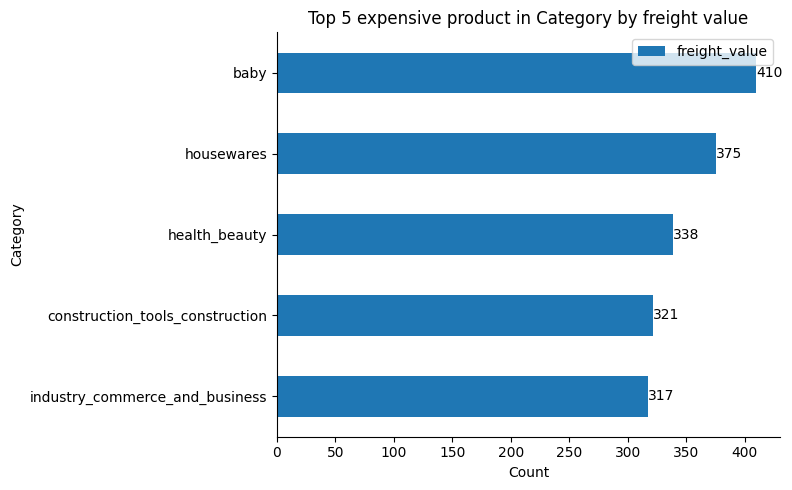

In [38]:
# Barang mana yang memiliki biaya pengangkutan yang mahal?
# Nilai pengangkutan termahal
tmp_top5_high_freight_value_df = tmp_merge_products_df.groupby(['product_category_name_english']).agg({
                                                    'freight_value': 'max'}).sort_values(by='freight_value', ascending=False).head(5)

splot = tmp_top5_high_freight_value_df.sort_values(by='freight_value', ascending=True).plot(kind='barh', figsize=(8, 5))
plt.title('Top 5 expensive product in Category by freight value')
plt.xlabel('Count')
plt.ylabel('Category')
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Pertanyaan 7: Barang apa saja yang termahal dalam produk?

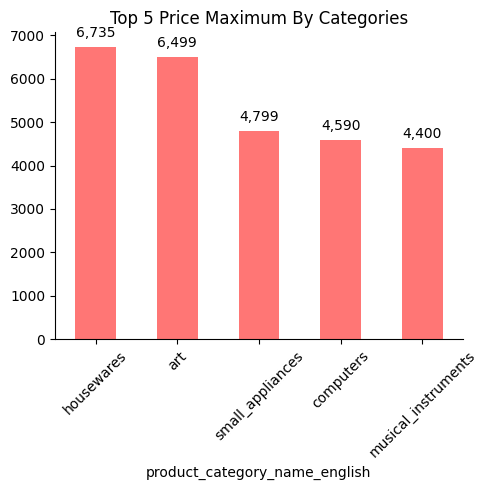

In [39]:
# Melihat barang termahal
tmp_aggr_merge_products= tmp_merge_products_df.groupby(['product_category_name_english']).agg({'price': ['min', 'max', 'mean']})

# Melihat barang dengan penjualan termahal
splot2 = tmp_aggr_merge_products[('price', 'max')].sort_values(ascending=False).head().plot.bar(color='#ff7675', figsize=(5,5))
for k in splot2.patches:
  splot2.annotate(format(k.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                  (k.get_x() + k.get_width() / 2., k.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')
# plt.legend(['Average Income'])
plt.title('Top 5 Price Maximum By Categories')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Pertanyaan 8: Bagaimana persentase review score dari masing-masing produk?

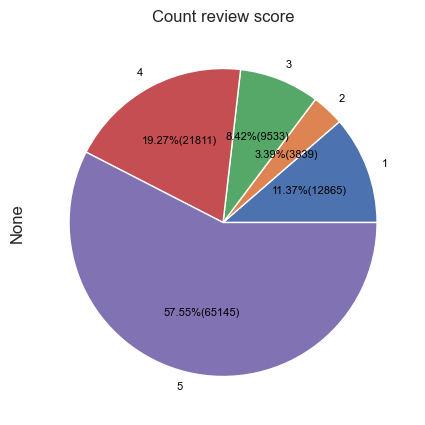

In [40]:
# PIE CHART berdasarkan score
days = tmp_merge_products_df.groupby('review_score').size()
sns.set()
days.plot(kind='pie', title='Count review score', figsize=[5,5],
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*days.sum()), fontsize=8, textprops={'color':"black"})
plt.show()

### Pertanyaan 9: Bagaimana pengeluaran customer yang melakukan pembayaran dari masing-masing tipe pembayaran?

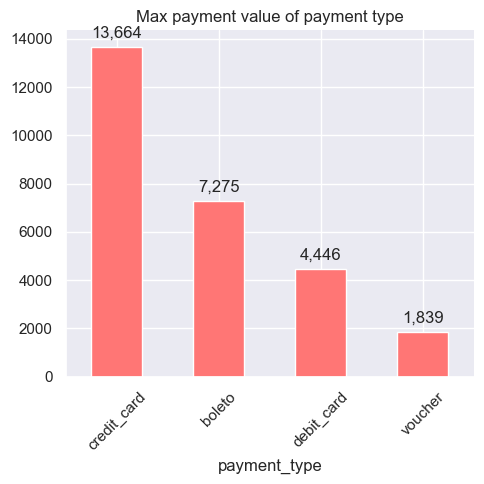

In [41]:
tmp_aggr_payments_products= tmp_merge_products_df.groupby(['payment_type']).agg({'payment_value': ['min', 'max', 'mean']})
splot2 = tmp_aggr_payments_products[('payment_value', 'max')].sort_values(ascending=False).plot.bar(color='#ff7675', figsize=(5,5))
for k in splot2.patches:
  splot2.annotate(format(k.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                  (k.get_x() + k.get_width() / 2., k.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')

# plt.legend(['Average Income'])
plt.title('Max payment value of payment type')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

In [42]:
# dari mana saja customer terbanyak?
# pembelian barang mahal berada di kota mana?
# dari mana customer dengan pembelian terbanyak?
# dari mana seller dengan penjualan terbanyak?

# order_items_ df = seller_id
# orders_df = customer_id
geolocations_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [43]:
tmp_customer_locations_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id,order_status,...,review_comment_title,review_comment_message,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,Super Recomendo,"Perfeito, Produto Entregue Antes Do Combinado.",1,credit_card,2,72.19,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,delivered,...,Super Recomendo,"Lannister Como Sempre, Entregou Certinho E Den...",1,boleto,1,73.86,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,4ef55bf80f711b372afebcb7c715344a,delivered,...,Super Recomendo,Carrinho Muito Bonito,1,credit_card,2,83.23,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,30407a72ad8b3f4df4d15369126b20c9,delivered,...,Super Recomendo,Muito Bom,1,credit_card,3,75.07,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,91a792fef70ecd8cc69d3c7feb3d12da,delivered,...,Super Recomendo,Muito Bom,1,credit_card,4,72.19,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG


### Pertanyaan 10: Bagaimana pengeluaran rata-rata customer berdasarkan kota customer?

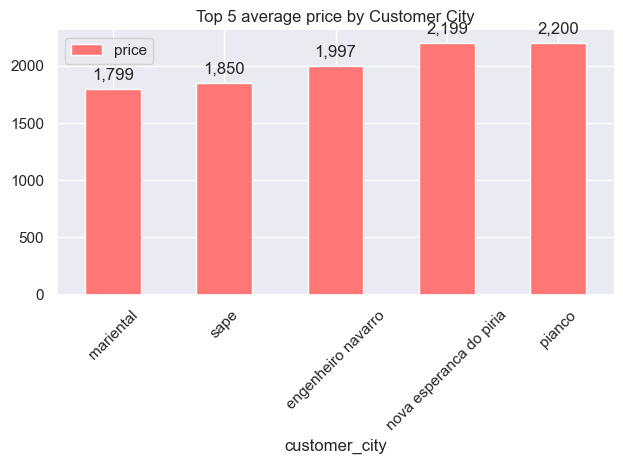

In [44]:
# Top 5 rata-rata pembelian harga products berdasarkan customer city
top5_customer_byprice_df = tmp_customer_locations_df.groupby(['customer_city']).agg({
    'price': 'mean'}).sort_values(by='price', ascending=False).head()

splot2 = top5_customer_byprice_df.sort_values(by='price', ascending=True).plot.bar(color='#ff7675')
for k in splot2.patches:
  splot2.annotate(format(k.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                  (k.get_x() + k.get_width() / 2., k.get_height()),
                  ha = 'center',
                  va = 'center',
                  xytext = (0, 10),
                  textcoords = 'offset points')
# plt.legend(['Average Income'])
plt.title('Top 5 average price by Customer City')
plt.xticks(rotation=45)
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Pertanyaan 11: Dari kota dan negara mana customer dengan pembelian terbanyak?

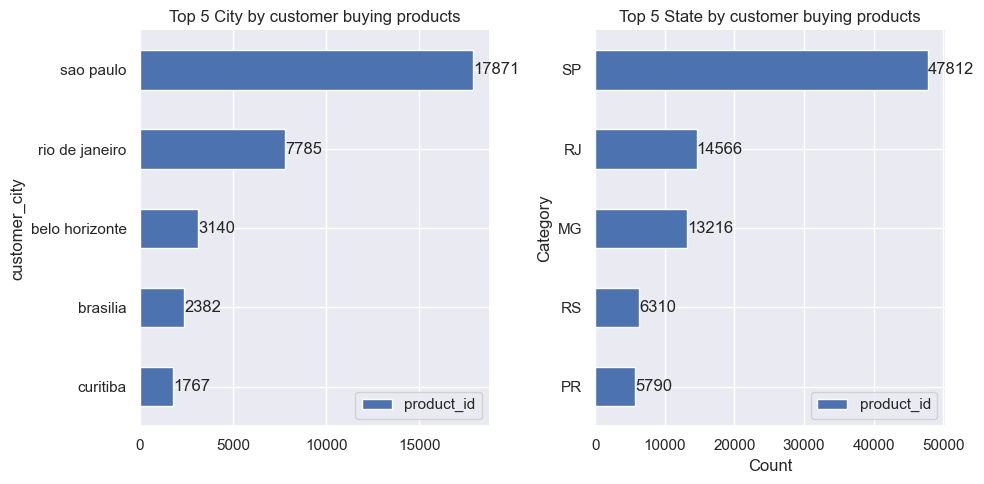

In [45]:
# dari mana customer dengan pembelian terbanyak?
fig,ax = plt.subplots(1,2)
tmp_top5_product_bycustomers_df = tmp_customer_locations_df.groupby(['customer_city']).agg({
                                  'product_id':'count'}).sort_values(by='product_id', ascending=False).head()

splot = tmp_top5_product_bycustomers_df.sort_values(by='product_id', ascending=True).plot(kind='barh', ax=ax[0], figsize=(10,5))
ax[0].set_title('Top 5 City by customer buying products')
plt.xlabel('Count')
plt.ylabel('Category')
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')
sns.despine(top=True, right=True)
# plt.tight_layout()
# plt.show()

tmp_top5_product_bycustomers_df = tmp_customer_locations_df.groupby(['customer_state']).agg({
                                  'product_id':'count'}).sort_values(by='product_id', ascending=False).head()

splot = tmp_top5_product_bycustomers_df.sort_values(by='product_id', ascending=True).plot(kind='barh', ax=ax[1], figsize=(10,5))
ax[1].set_title('Top 5 State by customer buying products')
plt.xlabel('Count')
plt.ylabel('Category')
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

### Pertanyaan 12: Dari kota dan negara mana seller melakukan penjualan terbanyak?

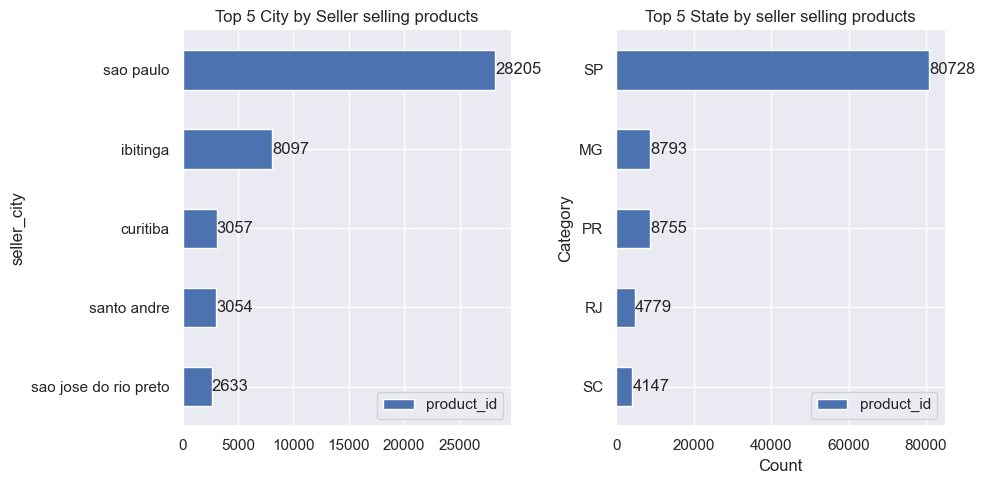

In [46]:
# dari mana seller dengan penjualan terbanyak?
fig,ax = plt.subplots(1,2)
tmp_top5_product_bycustomers_df = tmp_seller_locations_df.groupby(['seller_city']).agg({
                                  'product_id':'count'}).sort_values(by='product_id', ascending=False).head()

splot = tmp_top5_product_bycustomers_df.sort_values(by='product_id', ascending=True).plot(kind='barh', ax=ax[0], figsize=(10,5))
ax[0].set_title('Top 5 City by Seller selling products')
plt.xlabel('Count')
plt.ylabel('Category')
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')
sns.despine(top=True, right=True)
# plt.tight_layout()
# plt.show()

tmp_top5_product_bycustomers_df = tmp_seller_locations_df.groupby(['seller_state']).agg({
                                  'product_id':'count'}).sort_values(by='product_id', ascending=False).head()

splot = tmp_top5_product_bycustomers_df.sort_values(by='product_id', ascending=True).plot(kind='barh', ax=ax[1], figsize=(10,5))
ax[1].set_title('Top 5 State by seller selling products')
plt.xlabel('Count')
plt.ylabel('Category')
for c in splot.containers:
    # set the bar label
    splot.bar_label(c, fmt='%.0f', label_type='edge')
sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()

## RFM Analysis

###Menggunakan RFM analysis dengan tujuan untuk melihat customer mana yang menjadi customer terbaik pada perusahaan ini

In [47]:
tmp_merge_products_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name_english',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [48]:
# let's we find the last purchase
print(tmp_merge_products_df['order_purchase_timestamp'].max())
# 2018-09-09 is the customer did last purchase
now =  dt.datetime(2018, 9, 3)

2018-08-29 15:00:37


In [49]:
tmp_merge_products_df.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id,order_status,...,order_estimated_delivery_date,product_category_name_english,review_id,review_score,review_comment_title,review_comment_message,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-29,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5,Super Recomendo,"Perfeito, Produto Entregue Antes Do Combinado.",1,credit_card,2,72.19
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,e6eecc5a77de221464d1c4eaff0a9b64,delivered,...,2017-07-26,cool_stuff,b11cba360bbe71410c291b764753d37f,5,Super Recomendo,"Lannister Como Sempre, Entregou Certinho E Den...",1,boleto,1,73.86
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,4ef55bf80f711b372afebcb7c715344a,delivered,...,2018-06-07,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4,Super Recomendo,Carrinho Muito Bonito,1,credit_card,2,83.23


array([[<Axes: title={'center': 'order_item_id'}>,
        <Axes: title={'center': 'shipping_limit_date'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'freight_value'}>],
       [<Axes: title={'center': 'order_purchase_timestamp'}>,
        <Axes: title={'center': 'order_approved_at'}>,
        <Axes: title={'center': 'order_delivered_carrier_date'}>,
        <Axes: title={'center': 'order_delivered_customer_date'}>],
       [<Axes: title={'center': 'order_estimated_delivery_date'}>,
        <Axes: title={'center': 'review_score'}>,
        <Axes: title={'center': 'payment_sequential'}>,
        <Axes: title={'center': 'payment_installments'}>],
       [<Axes: title={'center': 'payment_value'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

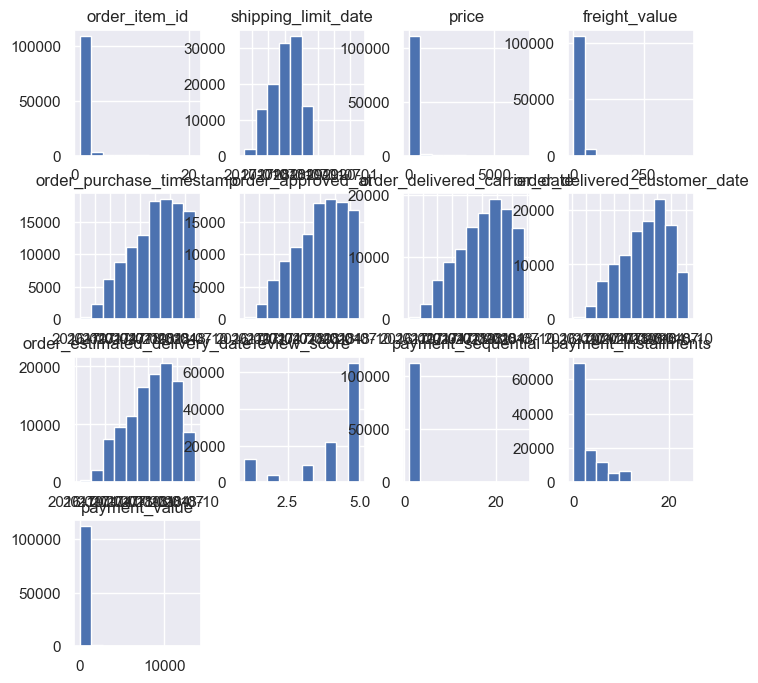

In [50]:
tmp_merge_products_df.hist(figsize=(8,8))

In [51]:
rfm = tmp_merge_products_df.groupby('customer_id').agg({'order_purchase_timestamp' : lambda day : (now - day.max()).days,
                                    'product_id' : lambda num : len(num),
                                    'price' : lambda price : price.sum()
                                    })
col_list = ['Recency','Frequency','Monetary']
rfm.columns = col_list
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,292,1,89.80
000161a058600d5901f007fab4c27140,413,1,54.90
0001fd6190edaaf884bcaf3d49edf079,551,1,179.99
0002414f95344307404f0ace7a26f1d5,382,1,149.90
000379cdec625522490c315e70c7a9fb,153,1,93.00


In [52]:
# Geek
rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100

rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm['RFM_Score'] = 0.15*rfm['R_rank_norm']+0.28 * \
    rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)
rfm.head()

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,292,1,89.80,34.04,43.46,43.46,2.10
000161a058600d5901f007fab4c27140,413,1,54.90,16.50,43.46,43.46,1.97
0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,2.70,43.46,43.46,1.87
0002414f95344307404f0ace7a26f1d5,382,1,149.90,20.83,43.46,43.46,2.00
000379cdec625522490c315e70c7a9fb,153,1,93.00,66.70,43.46,43.46,2.35


#### Scaler

In [53]:
x_scaled = rfm[['R_rank_norm', 'F_rank_norm', 'M_rank_norm']]
# x = rfm[['Recency', 'Frequency', 'Monetary']]
# sc = StandardScaler()
# x_scaled = sc.fit_transform(x)

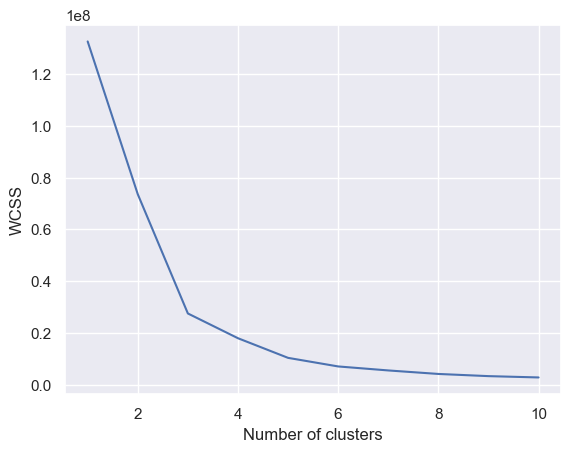

In [54]:
# Mencari elbow untuk melihat cluster terbaik
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
# Cluster terbaik di 3
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(x_scaled)

In [56]:
rfm['Cluster'] = y_kmeans
rfm.head(3)

,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Cluster
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,292,1,89.80,34.04,43.46,43.46,2.10,0
000161a058600d5901f007fab4c27140,413,1,54.90,16.50,43.46,43.46,1.97,0
0001fd6190edaaf884bcaf3d49edf079,551,1,179.99,2.70,43.46,43.46,1.87,0


In [57]:
# rfm.to_csv('rfm.csv')

In [58]:
datamart_melt = pd.melt(rfm.reset_index(),
id_vars=['customer_id', 'Cluster'],
        value_vars=['Recency', 'Frequency' , 'Monetary'],
        var_name='Attribute' ,
        value_name='Value')
datamart_melt.head()

,customer_id,Cluster,Attribute,Value
0,00012a2ce6f8dcda20d059ce98491703,0,Recency,292.0
1,000161a058600d5901f007fab4c27140,0,Recency,413.0
2,0001fd6190edaaf884bcaf3d49edf079,0,Recency,551.0
3,0002414f95344307404f0ace7a26f1d5,0,Recency,382.0
4,000379cdec625522490c315e70c7a9fb,1,Recency,153.0


<Axes: title={'center': 'Snake plot of standardized variables'}, xlabel='Attribute', ylabel='Value'>

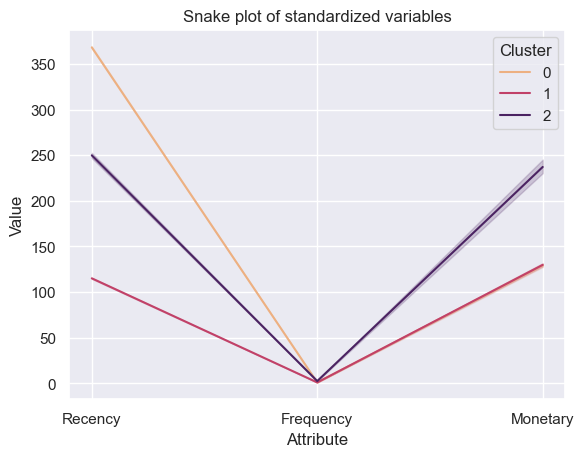

In [59]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute" , y="Value" , hue='Cluster' , data=datamart_melt, palette='flare')

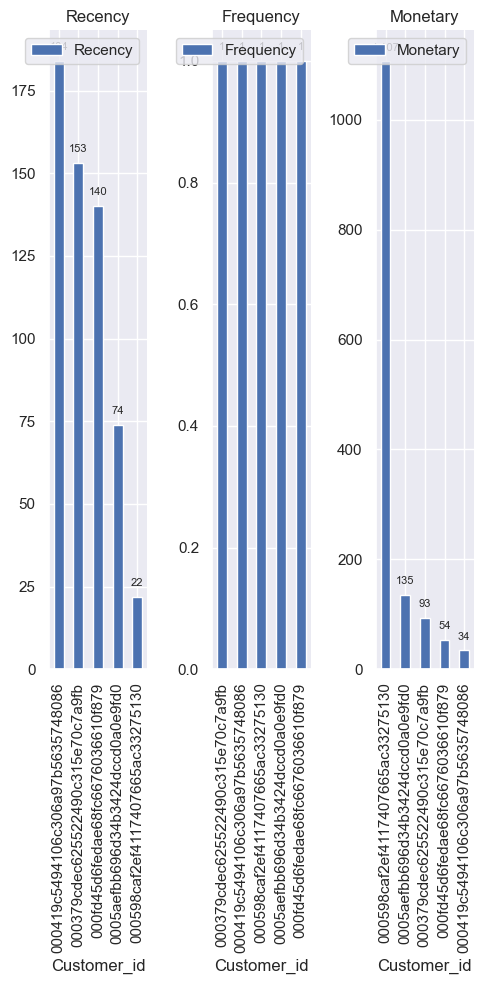

In [60]:
fig, ax = plt.subplots(1,3)
# cluster_1.groupby(['Customer_id'])[['Recency']].head().sort_values(by='Recency', ascending=False)
cluster_1 = rfm[rfm['Cluster']==1]
cluster_1['Customer_id'] = cluster_1.index
splot0 = cluster_1.groupby(['Customer_id']).agg({'Recency':'max'}).head().sort_values(by='Recency', ascending=False).plot.bar(ax=ax[0], figsize=(5, 10))
splot1 = cluster_1.groupby(['Customer_id']).agg({'Frequency':'max'}).head().sort_values(by='Frequency', ascending=False).plot.bar(ax=ax[1], figsize=(5, 10))
splot2 = cluster_1.groupby(['Customer_id']).agg({'Monetary':'max'}).head().sort_values(by='Monetary', ascending=False).plot.bar(ax=ax[2], figsize=(5, 10))

# Recency
for p in splot0.patches:
    splot0.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points',
                    fontsize=8)

# Frequency
for p in splot1.patches:
    splot1.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points',
                    fontsize=8)

# Monetary
for p in splot2.patches:
    splot2.annotate(format(p.get_height(), ',.0f'), # Getting annotate into thousand using format pacifier ,.0f
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center',
                    va = 'center',
                    xytext = (0, 10),
                    textcoords = 'offset points',
                    fontsize=8)

ax[0].set_title('Recency')
ax[1].set_title('Frequency')
ax[2].set_title('Monetary')
sns.despine(right=True,top = True)
plt.tight_layout()
plt.show()

##Conclusions

- Conclusion pertanyaan 1: Pada bulan Maret s/d Mei perusahaan memiliki pendapatan yang sangat tinggi, namun pada bulan Juni s/d Agustus memiliki penurunan yang drastis

- Conclusion pertanyaan 2: Sebanyak 99.99% produk terkirim ke pelanggan, dan hanya 0.01% dari keseluruhan produk yang gagal terkirim

- Conclusion pertanyaan 3 & 4: Customer memiliki pembayaran terbanyak menggunakan credit card sebanyak 73% dan memiliki angsuran terbanyak hingga mencapai 24x pembayaran angsuran yang menggunakan credit card

- Conclusion pertanyaan 5: Kategori Bed_bath_table memiliki penjualan yang paling banyak diantara semua produk, yaitu hingga 11rb

- Conclusion pertanyaan 6: Barang dengan kategori baby memiliki biaya pengangkutan yang paling mahal

- Conclusion pertanyaan 7: Barang dengan kategori housewares merupakan barang dengan harga tertinggi

- Conclusion pertanyaan 8: Rating 5 merupakan rating terbanyak diantar keseluruhan, yaitu hingga 57%

- Conclusion pertanyaan 9: Credit card merupakan tipe pembayaran dengan angsuran pembayaran paling tinggi

- Conclusion pertanyaan 10: Customer dengan kota pianco merupakan customer dengan melakukan pembelian dengan rata-rata tertinggi, yaitu hingga 2.200 USD

- Conclusion pertanyaan 11: Kota Sao paulo dan negara SP merupakan customer terbanyak yang melakukan pembelian pada perusahaan ini

- Conclusion pertanyaan 12: Kota Sao paulo dan negara SP merupakan seller terbanyak yang melakukan penjualan produk dari perusahaan ini